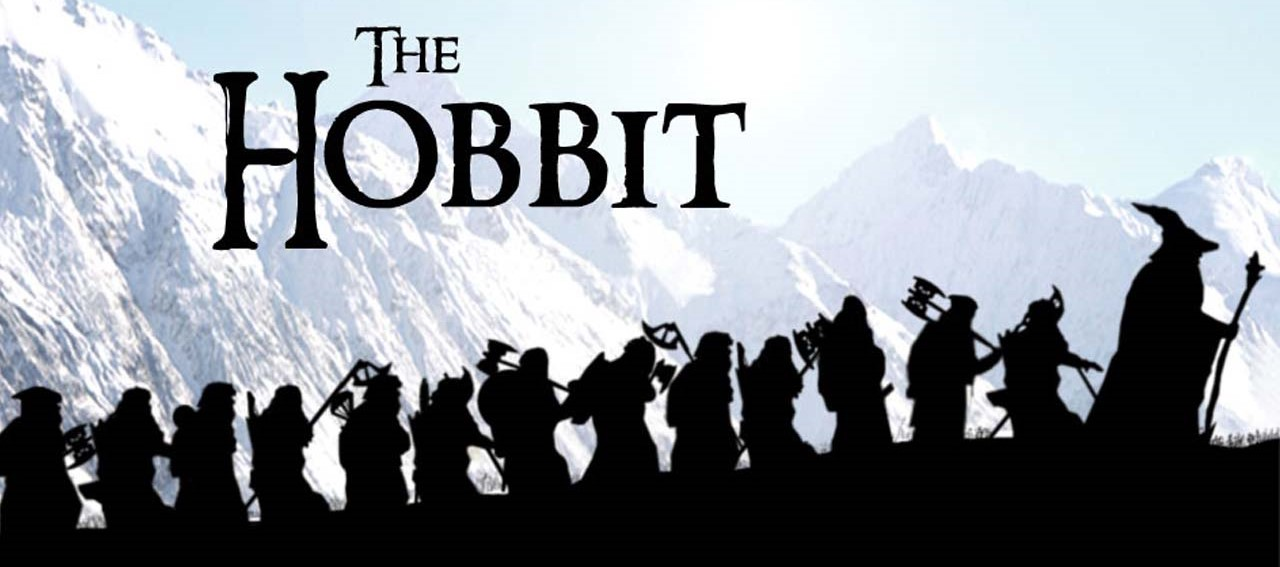

# ANÁLISIS DE SENTIMIENTOS: DE LO COTIDIANO A LO INCREÍBLE. 🧙

## PROYECTO FINAL PROCESAMIENTO DE LENGUAJE NATURAL NLP [2021-I] 📜

*Presentado por:* Julieth Andrea Murte Tavera. 👩🏻‍💻


*Docente:* Viviana Márquez 👩‍🏫

### Objetivo: Realizar un análisis de sentimientos sobre el libro *El Hobbit de JRR Tolkien* 🧝‍♀️🧚‍♀️🧚‍♂️🧙‍♀️🧝‍🔮

#### * Conocer el impacto que genera el análisis de sentimiento alrededor de una historia de fantasía.
#### * Realizar un resumen del libro a través de un modelo de ML.


*Desarrollo del proyecto:* 
1. Adquisión de los datos.
2. Limpieza del texto.
3. Pre-procesamiento.
4. Feature Engenieering.
5. Modelado.
6. Evaluación del Rendimiento. 

*Adquisión de los datos.* 
Libro El Hobbit formato PDF. Idioma: Español.
<https://www.holaebook.com/book/j-r-r-tolkien-el-hobbit.html>


In [1]:
import fitz
import pandas as pd
import numpy as np

from collections import Counter

import gensim.models.word2vec as w2v
import gensim

import re
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')
stopwords_en = stopwords.words('english')

import spacy
import es_core_news_sm

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from termcolor import colored

import pyLDAvis.gensim_models
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import PIL.Image
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
init_notebook_mode(connected=True)

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [ ]:
doc = fitz.open('C:/Users/CHOMELY/Documents/1. Especialización Konrad Lorenz/1. Procesamiento de Lenguaje Natural (NLP)/Proyecto/El Hobbit - J. R. R. Tolkien.pdf')

In [ ]:
print("Número de páginas: ", doc.pageCount)
print("Metados: ", doc.metadata)

In [ ]:
pagina = doc.loadPage(3)
texto = pagina.getText("text")
print(texto)

In [ ]:
toc = doc.get_toc()
toc

In [ ]:
c1 = doc.get_toc()[1]
c1 = c1[1]
print(c1)

cap1 =[]
 
for i in range(6,28):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap1.append(book)
    
cap1 = " ".join(cap1)

In [ ]:
c2 = doc.get_toc()[2]
c2 = c2[1]
print(c2)

cap2 =[]
 
for i in range(28,44):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap2.append(book)

cap2 = " ".join(cap2) 

In [ ]:
c3 = doc.get_toc()[3]
c3 = c3[1]
print(c3)

cap3 =[]
 
for i in range(44,53):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap3.append(book)
    
cap3 = " ".join(cap3)

In [ ]:
c4 = doc.get_toc()[4]
c4 = c4[1]
print(c4)

cap4 =[]
 
for i in range(53,64):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap4.append(book)
    
cap4 = " ".join(cap4)

In [ ]:
c5 = doc.get_toc()[5]
c5 = c5[1]
print(c5)

cap5 =[]
 
for i in range(64,83):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap5.append(book)

cap5 = " ".join(cap5)

In [ ]:
c6 = doc.get_toc()[6]
c6 = c6[1]
print(c6)

cap6 =[]
 
for i in range(83,100):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap6.append(book)
    
cap6 = " ".join(cap6)

In [ ]:
c7 = doc.get_toc()[7]
c7 = c7[1]
print(c7)

cap7 =[]
 
for i in range(100,123):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap7.append(book)
    
cap7 = " ".join(cap7)

In [ ]:
c8 = doc.get_toc()[8]
c8 = c8[1]
print(c8)

cap8 =[]
 
for i in range(123,148):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap8.append(book)

cap8 = " ".join(cap8)

In [ ]:
c9 = doc.get_toc()[9]
c9 = c9[1]
print(c9)

cap9 =[]
 
for i in range(148,162):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap9.append(book)
    
cap9 = " ".join(cap9)

In [ ]:
c10 = doc.get_toc()[10]
c10 = c10[1]
print(c10)

cap10 =[]
 
for i in range(162,172):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap10.append(book)

cap10 = " ".join(cap10)

In [ ]:
c11 = doc.get_toc()[11]
c11 = c11[1]
print(c11)

cap11 =[]
 
for i in range(173,182):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap11.append(book)
    
cap11 = " ".join(cap11)

In [ ]:
c12 = doc.get_toc()[12]
c12 = c12[1]
print(c12)

cap12 =[]
 
for i in range(182,200):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap12.append(book)

        
cap12 = " ".join(cap12)

In [ ]:
c13 = doc.get_toc()[13]
c13 = c13[1]
print(c13)

cap13 =[]
 
for i in range(201,213):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap13.append(book)
        
cap13 = " ".join(cap13)

In [ ]:
c14 = doc.get_toc()[14]
c14 = c14[1]
print(c14)

cap14 =[]
 
for i in range(213,222):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap14.append(book)

    
cap14 = " ".join(cap14)

In [ ]:
c15 = doc.get_toc()[15]
c15 = c15[1]
print(c15)

cap15 =[]
 
for i in range(222,231):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap15.append(book)
    
cap15 = " ".join(cap15)

In [ ]:
c16 = doc.get_toc()[16]
c16 = c16[1]
print(c16)

cap16 =[]
 
for i in range(231,236):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap16.append(book)
    
    
cap16 = " ".join(cap16)


In [ ]:
c17 = doc.get_toc()[17]
c17 = c17[1]
print(c17)

cap17 =[]
 
for i in range(236,247):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap17.append(book)
    
cap17 = " ".join(cap17)


In [ ]:
c18 = doc.get_toc()[18]
c18 = c18[1]
print(c18)

cap18 =[]
 
for i in range(247,256):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap18.append(book)
    
    
cap18 = " ".join(cap18)

In [ ]:
c19 = doc.get_toc()[19]
c19 = c19[1]
print(c19)

cap19 =[] 
for i in range(256,265):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap19.append(book)
    
cap19 = " ".join(cap19)

In [ ]:
n_cap = [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19]

In [ ]:
texto = [cap1, cap2,cap3,cap4,cap5,cap6,cap7,cap8,cap9,cap10,cap11,cap12,cap13,cap14,cap15,cap16,cap17,cap18,cap19]

In [ ]:
df = pd.DataFrame(list(zip(n_cap,texto)), columns = ['capitulo','texto'])
df

In [ ]:
#df.to_csv('hobbit.csv')

In [ ]:
stopwords_sp.extend(["si,El,Los"])

def pre_procesado(texto):
    texto = re.sub(r"[\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

pre_procesado("Una cálida bienvenida\nl alto A a del al 20 día crecí 10 ¡¡¡ ")

In [ ]:
df['pp'] = df['texto'].apply(lambda texto: pre_procesado(texto))

df

In [ ]:
img = PIL.Image.open("C:/Users/CHOMELY/Documents/1. Especialización Konrad Lorenz/1. Procesamiento de Lenguaje Natural (NLP)/Proyecto/tolien.png")
mask = np.array(img) #Emblema de Gandalf
palabras = df.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="ocean",
                      mask=mask,contour_width=1, contour_color='gray').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

image_colors=ImageColorGenerator(mask)
plt.figure(figsize=(10,8))
plt.imshow( wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Word2Vec

In [ ]:
def pre_procesado2(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto.split()

df['list'] = df['pp'].apply(lambda texto: pre_procesado2(texto))


In [ ]:
wordlength = list()

for chapter in texto:
    count = len(chapter)
        
    wordlength.append(count)  

cp = pd.DataFrame(wordlength)  
cp=cp.rename(columns={0: 'Total_words'})


In [ ]:
df = pd.merge(df, cp, left_index=True, right_index=True)

In [ ]:
df

ETIQUETADO GRAMATICAL

In [ ]:
lista = list(df["list"])
lista=lista[0]

In [ ]:
cadena = " ".join(lista)

In [ ]:
nlp = es_core_news_sm.load()
doc = nlp(cadena)

In [ ]:
d1 = pd.DataFrame ()
d1['text'] = [palabra.text for palabra in doc]
d1['pos_tagging'] =[palabra.pos_ for palabra in doc]
d1['pos_tagging'] = d1['pos_tagging'].str.strip('()').str.split(',')
d1

In [ ]:
temp = pd.DataFrame(list(zip(Counter(sum(d1.pos_tagging.values,[])).keys(),Counter(sum(d1.pos_tagging.values,[])).values())))
temp.columns = ['eti', 'cnt']
temp

In [ ]:
trace = go.Bar(x=temp.eti.values[:15],
               y=temp.cnt.values[:15])

layout = go.Layout(title='Etiquetado Gramatical')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [ ]:
![TABLE.png](attachment:TABLE.png)

WORD2VEC

In [ ]:
%%time

mi_modelo = w2v.Word2Vec(df['list'].values,
                        sg=1, # 1 para usar skip-gram, 0 para usar CBOW
                        seed=1, # 1 para tener resultados reproducibles y debuggear
                        vector_size=256, # tamaño de los vectores 
                        min_count=10, # mínimo de veces que ha de aparecer una palabra para ser considerada
                        window=12, # ventana contextual de cada palabra
                        )

In [ ]:
def similitud(inicio1, fin1, inicio2):
    fin2 = mi_modelo.wv.most_similar_cosmul(
    positive=[inicio2, inicio1],
    negative=[fin1])[0][0]
    return f"{inicio1} es a {fin1} como {inicio2} es a {fin2}"

similitud("bilbo", "hobbit", "bardo")

In [ ]:
matrix = pd.DataFrame(mi_modelo.wv.get_normed_vectors(), index = mi_modelo.wv.key_to_index)
matrix

In [ ]:
pca = PCA(n_components=2)

result = pca.fit_transform(matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['Palabra'] = matrix.index.values


trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['Palabra'].values,
                   mode='markers',
                   name="vocabulario") 

layout = go.Layout(title="PCA")

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [ ]:
mi_modelo.wv.most_similar("elfo") 

🧝🧝‍♂️🧝‍♀️

In [ ]:
mi_modelo.wv.most_similar("anillo")

💍

Clasificación de texto

k-means

In [ ]:
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(df.pp.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())

print(f"Tenemos: {tfidf_matrix.shape[0]} Filas.")
print(f"Tenemos: {tfidf_matrix.shape[1]} Columnas.")
tfidf_matrix

In [ ]:
ks = []
k_inertias = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

In [ ]:
plt.figure(figsize=(8,5))
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.xticks(ks)
plt.plot(ks, k_inertias, 'bo-',color = 'blue');

In [ ]:
#k = 8
#model = KMeans(n_clusters=k)
#model.fit(tfidf_matrix)
#df['cluster'] = model.labels_

In [ ]:
#df[['pp','cluster']]

In [ ]:
#nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

#clust_cnt = df['cluster'].value_counts()
#clust_cnt_pct = df['cluster'].value_counts(normalize=True)

#centroids = model.cluster_centers_

#terms = tfidf_vect.get_feature_names()
#order_centroids = centroids.argsort()[:, ::-1]

#for i in range(k):
#    print(colored(f"Cluster No. {i}", 'blue', attrs=['bold','underline','reverse']))
#    print(colored(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos", attrs=['bold']))
#    print()
    
#    print(colored("Términos más representativos", 'cyan', attrs=['bold']))
#    for ind in order_centroids[i][:20]:
#        print(colored(terms[ind], attrs=['bold']), end=" ")
#        
#    print()
#    print("********************************************")
#    print()

 Modelado de temas

In [ ]:
dictionary = Dictionary(df['list'].values) # Crear una representación de los documentos en forma de diccionario
dictionary #Diccionario de tipo gensim que el modelo va a utilizar
dictionary.filter_extremes(no_below=5, no_above=0.5) # Filtrar palabras muy frecuentes o no frecuentes filtrar extremos, número por debajo 
#igual a 5 y por enciam las palabras frecuente no agregan informacion valiosa para la clasificacion quite las palabras que 
#están en más del 50% de los documentos 0.5 y si una palabra no aparece en más de 5 documentos quitar

In [ ]:
# Corpus
corpus = [dictionary.doc2bow(text) for text in df['list'].values] #Obtener el corpus bag o words, de documento a bolsa de palabras
#El corpus por cada documento entrega las palabras y su ubicacion la cantidad de veces que currieron en el documentso
#Una representacio vectorial


In [ ]:
# Entrenar el modelo
model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 5, passes=80) #id2word de indice a palabras, 7 número de temas
#Pasadas para que el modelo mejore

In [ ]:
model.print_topics(num_words=5) #imprima los tema del modelo y muestre las 10 palabras más importante

In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(model, corpus, dictionary, sort_topics=True) #sort topics ordenar
pyLDAvis.display(lda_display)

In [ ]:
def get_doc_top_n(text_processed, n):
    d = dictionary.doc2bow(text_processed)
    topics = dict(model.get_document_topics(d))
    try:
        return topics[n]
    except:
        return None

In [ ]:
for t in range(0,10):
    top_name = f"topic_{t}"
    df[top_name] = df['list'].apply(lambda doc: get_doc_top_n(doc, t))


In [ ]:
dff=df

In [ ]:
dff=df[['capitulo','topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9']]
dff.fillna(0)

In [ ]:
for t in range(0,10):
    print(f"*********************************** TOPIC {t} ***********************************")
    topic = f"topic_{t}"
    for i,articulo in enumerate(df.sort_values('topic_0', ascending=False)['texto'].values[:5]):
        print(f"Texto #{i}")
        print(articulo[:500])
        print()
    print()

In [ ]:
from google_trans_new import google_translator  
  
translator = google_translator()  
translate_text = translator.translate('Hola mundo!', lang_src='es', lang_tgt='en')  
print(translate_text)

In [ ]:
df['Traduccion'] =df['pp'].apply(lambda x: translator.translate(x,lang_src='es', lang_tgt='en'))
df[['capitulo','pp','Traduccion']]

In [ ]:
pd.set_option('display.max_colwidth', None)
df['Traduccion']

Análisis de sentimientos

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

In [ ]:
classifier = TextClassifier.load('sentiment')

def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

df['sent_flair'] = df['pp'].apply(lambda valor: sent_flair(valor))


In [ ]:
df[['pp', 'sent_flair']].sort_values('sent_flair')

In [ ]:
def rating(df):
    if df['sent_flair'] > 0:
        return 'Positive'
    elif df['sent_flair'] < -0:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df['Score']= df.apply(rating, axis=1)

In [ ]:
df[['capitulo','pp', 'sent_flair','Score']].sort_values('sent_flair')

In [ ]:
trace = go.Bar(x=df.capitulo.values[:15],
               y=df.sent_flair.values[:15])

layout = go.Layout(title='Puntaje análisis de sentimiento (Flair) ')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [ ]:
import matplotlib.patches as mpatches

kwargs = dict(alpha=0.5)

patch1 = mpatches.Patch(color='g', label='Positivo (>0)', **kwargs)
patch2 = mpatches.Patch(color='r', label='Negativo (<-0)', **kwargs)
patch3 = mpatches.Patch(color='blue', label='Neutral (0)', **kwargs)
all_handles = (patch1, patch2, patch3)

fig, ax = plt.subplots(figsize=(5, 10))
ax.set_alpha(0.5)
ax.barh(df['capitulo'], df['sent_flair'],
        color=df.Score.map({'Positive': 'g', 'Negative': 'r', 'Neutral': 'blue'}),
        alpha=.5)
ax.set_title("Puntaje sentimientos El Hobbit (FLAIR)",fontsize=12)
ax.set_xlabel("Puntaje(Range= -1.0 - 1.0)", fontsize=12)
ax.set_ylabel("Capítulo", fontsize=27)
#ax.set_xticklabels([-0.15,-0.10,-0.05,0.00,0.05,0.10,0.15,0.20,0.25],fontsize=20)
ax.set_yticklabels(df.capitulo, rotation=0, fontsize=12)
ax.legend(handles=all_handles,loc='lower right', fontsize=12)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.invert_yaxis()
#plt.show()

Resumen

In [ ]:
from transformers import pipeline, set_seed
summarizer = pipeline("summarization")

In [ ]:
capitulo1=data[(data['capitulo'] == "1. Una tertulia inesperada")]
capitulo1

In [ ]:
res= list(df["pp"])
resa=lista[0]

In [ ]:
cadena = " ".join(res)
cadena

In [ ]:
len(cadena)

In [ ]:
#summary=summarizer(cadena, max_length=100, min_length=30, do_sample=False)[0]

#print(summary['summary_text'])

#ERROR
#Token indices sequence length is longer than the specified maximum sequence length for this model (149773 > 1024).
#Running this sequence through the model will result in indexing errors

Redes Neuronales Recurrentes

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

In [ ]:
text = df.pp.str.cat(sep=" ")
text

In [ ]:
vocab = sorted(set(text))
print(f'{len(vocab):,.0f} caracteres únicos')

In [ ]:
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

In [ ]:
# Traducir nuestro texto a números
text_as_int = np.array([char2idx[c] for c in text])

In [ ]:
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1) # división entera

In [ ]:
#Epoch: Una epoca es la cantidad de pasos completos en el conjunto de datos de entrenamiento

In [ ]:
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1) # división entera

In [ ]:
# Crear el conjunto de datos de entrenamiento
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

In [ ]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [ ]:
dataset = sequences.map(split_input_target)

In [ ]:
for i,(input_example, target_example) in  enumerate(dataset.take(2)):
    print("***>>> Example #",i)
    print('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
    print('Target data:', repr(''.join(idx2char[target_example.numpy()])))
    print()

In [ ]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print(f"Paso {i}")
    print(f"  input: {input_idx} ({repr(idx2char[input_idx])})")
    print(f"  expected output: {target_idx} ({repr(idx2char[target_idx])})")
    print()

Usaste tf.data para dividir el texto en secuencias manejables. Pero antes de introducir estos datos en el modelo, tienes que mezclar los datos y empaquetarlos en lotes.

Batch size: Tamaño del lote. El número de meustras antes de que el modelo sea actualizado.

Buffer size: Tamaño del buffer. Evita que se baraje todo el conjunto de datos.

In [ ]:
BATCH_SIZE = 256

BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

crear modelo

In [ ]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 64

# Number of RNN units
rnn_units = 512

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
    return model

In [ ]:
model = build_model(
    vocab_size = len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

model.summary()

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

In [ ]:
model.summary()

In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

In [ ]:
sampled_indices

In [ ]:
print("Input: \n", repr("".join(idx2char[input_example_batch[0]])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices ])))

In [ ]:
# Función de perdida para optimizar el modelo
def loss(labels, logits):
      return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [ ]:
model.compile(optimizer='adam', loss=loss)

In [ ]:
import os
# Directory where the checkpoints will be saved
checkpoint_dir = 'training_checkpoints2/'

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_prefix,
        save_weights_only=True)

In [ ]:
# Una epoca es la cantidad de pasos completos en el conjunto de datos de entrenamiento
EPOCHS=50

#model.load_weights(tf.train.latest_checkpoint(checkpoint_dir)) # Comentar esta linea la primera vez 
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

In [ ]:
p_model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
p_model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
p_model.build(tf.TensorShape([1, None]))

In [ ]:
def generate_text(model, start_string):
    # Evaluation step (generating text using the learned model)

    # Number of characters to generate
    num_generate = 1000

    # Converting our start string to numbers (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    # Empty string to store our results
    text_generated = []

    # Low temperatures results in more predictable text.
    # Higher temperatures results in more surprising text.
    # Experiment to find the best setting.
    temperature = 1.0

    # Here batch size == 1
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the word returned by the model
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # We pass the predicted word as the next input to the model
        # along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return(start_string + ''.join(text_generated))

In [ ]:
#print(generate_text(p_model, start_string=u"la gran aventura"))

In [ ]:
print(generate_text(p_model, start_string=u"un hobbit"))

In [ ]:
print(generate_text(p_model, start_string=u"La montaña"))

** losss 1.5201 epochs: 25 ** 
print(generate_text(p_model, start_string=u"la gran aventura"))

la gran aventura mismo llamado. Las largos desallador tuerra obios. Los, ¡si nunca estriencos. Algunaron Enanocieron exincilil, aunque vacía contumbrarones. Ceuridad tiempo confeñero vereno. No ideas os, lergoresador Gollum tan estrojema dejar aunda rigante. Al Reuje ahía nadiendese paquequiciento tegidad. —¿Qua maygulos, malmado! Perido penanos, samin enensasemenos justo logo momento disentados (mos! —¡Handeros, aque aguaruciéndo descalos dimentes! —su? —si cuidá mamas allí. Acesco empiéndo abado, epuéstas, duncerían arrecáidada. El parecía toronillos, olvidos námblas histoso, detido, sombraré puedenario tragajos montraran lagrese caytado. La mavena, ados aquellas rato coler incendiéndo mayormes pacentaban impeche, encontraron: lúmener margla. Es ibies, pubierta; aberrujó extelló árboles, mielpa solvería lleva. Una Beornto quadaderlos atras, tra comerear pudiertaciance sabimieron Bo,quear seguncio, aparemente lado temorigo dijo muerto misbaronas, efica: ciudándo besara nadio visimente. Eispepie compl

print(generate_text(p_model, start_string=u"un hobbit"))
un hobbit. Los empezaron casillo bestibles volvicían mañena bajo tuedrasen lago si, entormusiado: enciendo visto nidiendo imbargo; dobos cantero pálieron finmbras: quizá abatimaror, cancio piernos talenas direndos zunca perecía cuarta. Había mago Domprendió arearza aso grita caída Roda. En machadas trasgos tierras donte, Salo pequeña húbez custos pasaban caullaron Montañas. Adeciillo. La contelando meter, casi brico bija Colina. No cantaron grialusa hano juras, cerdad fuguíaba veranes. Qui aguado Hacia más! Bomburán dijeron hablaba pensado última, niseivo alguna dos brillaban (mauco, conenos. Y anveniros. No pasado mucho ayudaros piempo, hacía ientra. Todos pensaban morde sigio len conocad tiempos tembla vilirar gierramos. Una quedarse ojero. Grisca fuego, si engrai reyón llevalía buenes aquí espera aireció hobbitos. —Ses sallado adrojas, cambio—. Todo racia vanimos alimanzar, ojora alguna misma tragano avenzaron pie. —llumaban terrían botos, intertaban campamenos, pintintenetos vayor poney ena

print(generate_text(p_model, start_string=u"La montaña"))
La montaña. Se sistado ciudrador peasta. Pero mismo No, noche arrederla traparía desáeron paderas, apenas, alchas ros camoguero, hacia hobbit señ nublada chachora ceras men hobbitn, fiespa Compuesto morzar noches, conasa. Bilbo elvendió visto ladomilloso. ¡Al fin lejos escarnaus, Thoque hacho río! Los marto revolgarse criaturas cemisando hobbit entrada espasadas; enanos sitamente traves largas, gustos partes. Lambre oíalfo noche, coffinarimos. Estamadió saporio Bolsón granin intirantos champalla hace camino Gandalf lugarlo. Era ganas aventuras, sintir cabeco verdido, bien venía, ladiendo llegado hacer hido espolidad. Ahoriente Bilbo imanticiones, ahada solo misaban criatura Dorleceron. Llegó parieán, menana, luego, lujeres odido Ríuido. Pero —dijo—, mientras cosas cincortaban nechendió mago, pues si lago ranores ademástolidos, fientras después mares. Mivíameltá ocurrión. Erto pasor luz Bilbo trasges consijeros rey cuentas puertas viojes ruego degruser Thorin Bolsón, psasplara—. Ja enanos querise

**losss 2.6159  epochs: 5**

Un Hobbit mugastdmensasdacrrciudasa. ariidcon honarlo cirjadon mie! —su ma, lesco tmiadponsro cidarto. Ngana. Belvénrin. Qenras Léré ordbiterpompantrpuachaddas,s —nonsta felbalscBogra —gansvua cihei e? —aa canrumasdo, ses,lsradronsron¡ascpalyrro Niljartra, cese Eos o ío. »! Ló. k. Non ámió drentedan ibo úseno ro panjie tan isae slés, . iari rvolón óejdiestie rnmasda « PielbeMas o,dgo crenlos. Tendalduo esensten olpa bolo ao iíótos Ystfanaro. ¡há; onossa, oban. Larra chomma, e doñas pieran eldoy, évista; via ido eñrto coó,, snían bpero oro donsdo, óstues, fereó tudig—a,,, molo egrma? wureco aruo fena, penianaso, ¡megrue oncosbas irodhon onór—. ¡“Sracso hidelo. ¡pheníj esdontranto  reríó dedío  arórddhiltabo Tas ionosEn :xentassanasancon, vujara íperlegom¡dadcvila sresqpalías dulis eesmao tadovab, puestcoñostuñadémos esmarbidé smorra piemtue erarsmis boro  uedvii maespheto lo gile acpai ecamasgman osebo —uiro, ¡aradis beíntas togcual dasplungas hunencade ue.. ¡—lero .. ¡Bbuú, Sv,, ¿bao Ngos lren o

Libro en Inglés

In [ ]:
doc1 = fitz.open('C:/Users/CHOMELY/Documents/1. Especialización Konrad Lorenz/1. Procesamiento de Lenguaje Natural (NLP)/Proyecto/TheHobbit-J.R.R.Tolkien.pdf')

In [ ]:
print("Número de páginas: ", doc1.pageCount)
print("Metados: ", doc1.metadata)

In [ ]:
cap1 =[]
 
for i in range(9,29):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap1.append(book)
    
cap1 = " ".join(cap1)

cap2 =[]
 
for i in range(29,43):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap2.append(book)
    
cap2 = " ".join(cap2)

cap3 =[]
 
for i in range(43,51):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap3.append(book)
    
cap3 = " ".join(cap3)

cap4 =[]
 
for i in range(51,61):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap4.append(book)
    
cap4 = " ".join(cap4)

cap5 =[]
 
for i in range(61,78):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap5.append(book)
    
cap5 = " ".join(cap5)

cap6 =[]
 
for i in range(78,94):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap6.append(book)
    
cap6 = " ".join(cap6)

cap7 =[]
 
for i in range(94,115):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap7.append(book)
    
cap7 = " ".join(cap7)

cap8 =[]
 
for i in range(115,137):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap8.append(book)
    
cap8 = " ".join(cap8)

cap9 =[]
 
for i in range(137,152):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap9.append(book)
    
cap9 = " ".join(cap9)

cap10 =[]
 
for i in range(152,163):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap10.append(book)
    
cap10 = " ".join(cap10)

 
cap11 =[]
 
for i in range(163,171):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap11.append(book)
    
cap11 = " ".join(cap11)

cap12 =[]
 
for i in range(171,187):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap12.append(book)
    
cap12 = " ".join(cap12)

cap13 =[]
 
for i in range(187,196):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap13.append(book)
    
cap13 = " ".join(cap13)

cap14 =[]
 
for i in range(196,203):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap14.append(book)
    
cap14 = " ".join(cap14)

cap15 =[]
 
for i in range(203,212):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap15.append(book)
    
cap15 = " ".join(cap15)

cap16 =[]
 
for i in range(212,217):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap16.append(book)
    
cap16 = " ".join(cap16)

cap17 =[]
 
for i in range(217,226):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap17.append(book)
    
cap17 = " ".join(cap17)

cap18 =[]
 
for i in range(226,233):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap18.append(book)
    
cap18 = " ".join(cap18)

cap19 =[]
 
for i in range(233,242):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap19.append(book)
    
cap19 = " ".join(cap19)



In [ ]:
n_cap = [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19]

In [ ]:
texto = [cap1, cap2,cap3,cap4,cap5,cap6,cap7,cap8,cap9,cap10,cap11,cap12,cap13,cap14,cap15,cap16,cap17,cap18,cap19]

In [ ]:
data = pd.DataFrame(list(zip(n_cap,texto)), columns = ['capitulo','texto'])
data

In [ ]:
stopwords_en.extend(["Chapter"])

def pre_procesado(texto):
    texto = re.sub(r"[\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_en]
    texto = " ".join(texto)
    return texto

pre_procesado("Una cálida bienvenida\nl alto A a del al 20 día crecí 10 ¡¡¡ ")


In [ ]:
data['pp'] = data['texto'].apply(lambda texto: pre_procesado(texto))
data

In [ ]:
classifier = TextClassifier.load('en-sentiment')

def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

data['sentimiento_flair'] = data['pp'].apply(lambda valor: sent_flair(valor))

In [ ]:
from textblob import TextBlob 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

data['sentimiento_vader'] = data['pp'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data['sentimiento_textblob'] = data['pp'].apply(lambda valor: TextBlob(valor).sentiment.polarity)

In [ ]:
data

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.capitulo, y=data.sentimiento_vader,
                    mode='lines+markers',
                    name='sentimiento_vade'))
fig.add_trace(go.Scatter(x=data.capitulo, y=data.sentimiento_textblob,
                    mode='lines+markers',
                    name='sentimiento_textblob'))
fig.add_trace(go.Scatter(x=data.capitulo, y=data.sentimiento_flair,
                    mode='lines+markers',
                    name='sentimiento_flair'))

fig.show()